Logistic Regression adalah suatu metode dalam statistika dan machine learning yang digunakan untuk melakukan klasifikasi. Meskipun memiliki nama "regression," Logistic Regression sebenarnya digunakan untuk memprediksi probabilitas sukses atau kejadian sukses, khususnya dalam masalah klasifikasi biner (dua kelas).

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Portofolio/Logistic Regression'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Portofolio/Logistic Regression/Logistic Regression.ipynb


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Portofolio/Logistic Regression/okcupid_profiles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [9]:
print(df['sign'].value_counts())

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

dari data diatas, terlalu banyak data tidak sesuai, maka jika dilihat semua sign/zodiak terletak di kata pertama, maka akan dilakukan split untuk mengambil kata pertama. karena zodiak terdiri dari 12

In [10]:
df['sign'] = df['sign'].str.split(' ').str[0]

In [11]:
print(df['sign'].value_counts())

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign, dtype: int64


Age
Height
Income

Plot dibawah menunjukkan distribusi dari kolom age, terlihat bahwa sebagian besar umur dari pengguna OKCupid berada pada rentang 20 - 35 tahun. Garis merah dibawah menunjukkan rata-rata umur dari pengguna adalah 32 tahun.

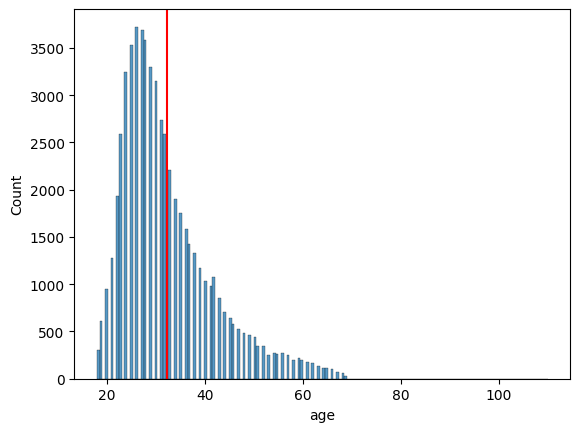

In [14]:
sns.histplot(data=df, x='age', stat='count')
plt.axvline(x=df.age.mean(), color='red')

<Axes: xlabel='age', ylabel='Count'>

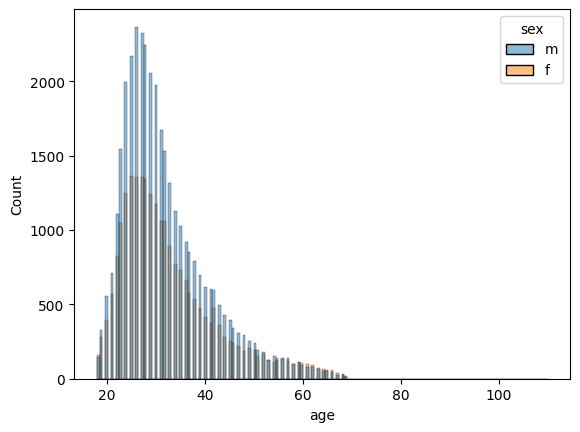

In [15]:
sns.histplot(data=df, x='age', stat='count', hue='sex')


Dibawah adalah distribusi dari kolom height sesuai dengan jenis kelamin, terlihat jelas bahwa perempuan terlihat lebih pendek dari pada laki-laki.

<Axes: xlabel='height', ylabel='Count'>

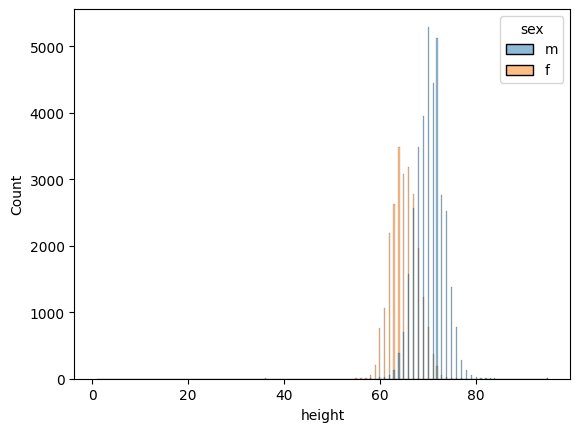

In [16]:
sns.histplot(data=df, x='height', hue='sex')

Sesuai dengan grafik dibawah, bisa kita lihat bahwa sebagian besar dari pengguna tidak memasukkan income mereka.

<Axes: xlabel='income', ylabel='Count'>

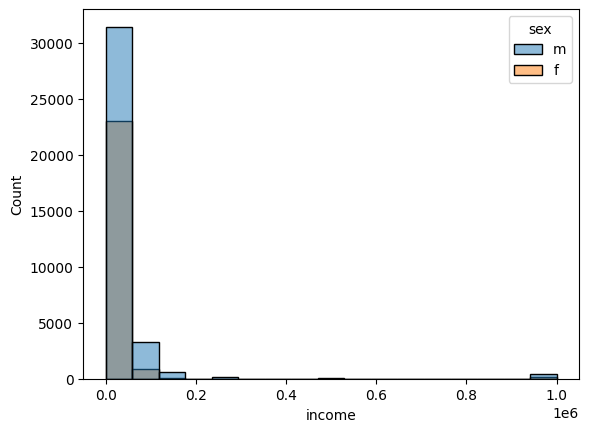

In [17]:
sns.histplot(data=df, x='income', hue='sex')

Sex
Pengguna OKCupid kebanyakan adalah laki-laki dengan jumlah ~36000, sedangkan perempuan ~23000

<Axes: xlabel='count', ylabel='sex'>

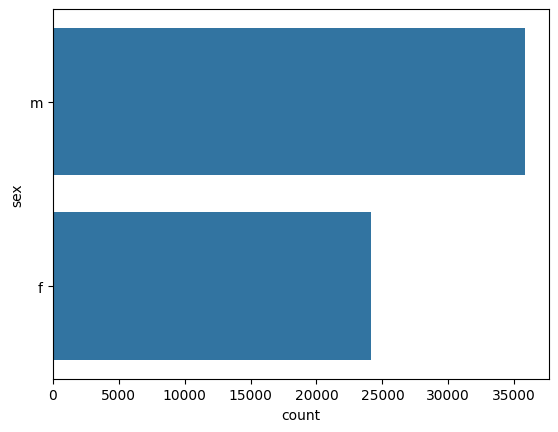

In [18]:
sns.countplot(data=df, y='sex')

<Axes: xlabel='count', ylabel='body_type'>

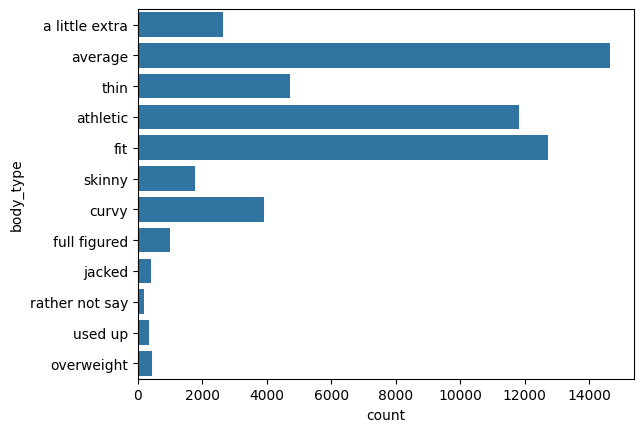

In [19]:
sns.countplot(data=df, y='body_type')

Body Type
Grafik Body type kolom dibawah menunjukkan, kebanyakan pengguna mendeskripsikan dirinya sebagai average, athletic atau fit.

Grafik dibawah menunjukkan Body Type kolom berdasarkan jenis kelamin. Terlihat jelas bahwa kebanyakan yang menrepresentasikan dirinya athletic adalah laki-laki dan yang menrepresentasikan dirinya curvy adalah kebanyakan perempuan.

<Axes: xlabel='count', ylabel='body_type'>

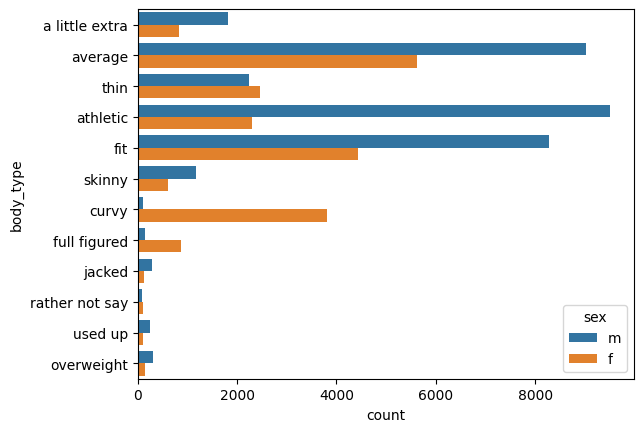

In [20]:
sns.countplot(data=df, y='body_type', hue='sex')

<Axes: xlabel='count', ylabel='drinks'>

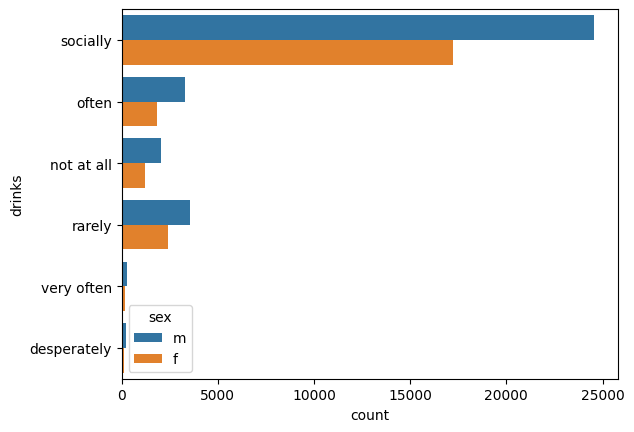

In [22]:
sns.countplot(data=df, y='drinks', hue='sex')

Drinks
Dari grafik dibawah terlihat sebagian besar pengguna OKCupid mengkonsumsi alkohol secara socially

<Axes: xlabel='count', ylabel='drugs'>

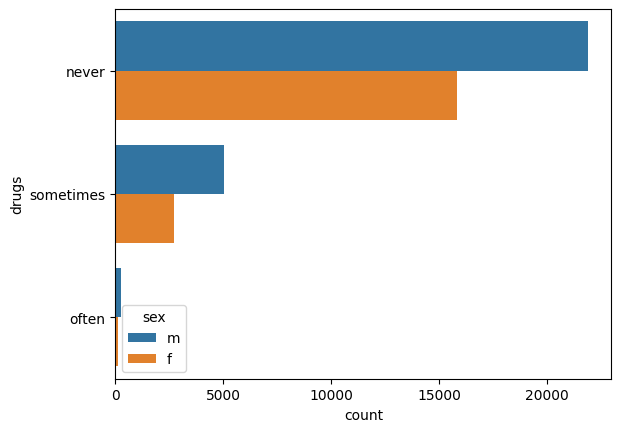

In [23]:
sns.countplot(data=df, y='drugs', hue='sex')

Drugs
Sebagian besar dari pengguna OKCupid tidak pernah mengkonsumsi narkoba, tapi ada ~8000 pengguna yang kadang mengkonsumsi itu dan ada juga beberapa yang sering mengkonsumsi narkoba.

<Axes: xlabel='count', ylabel='education'>

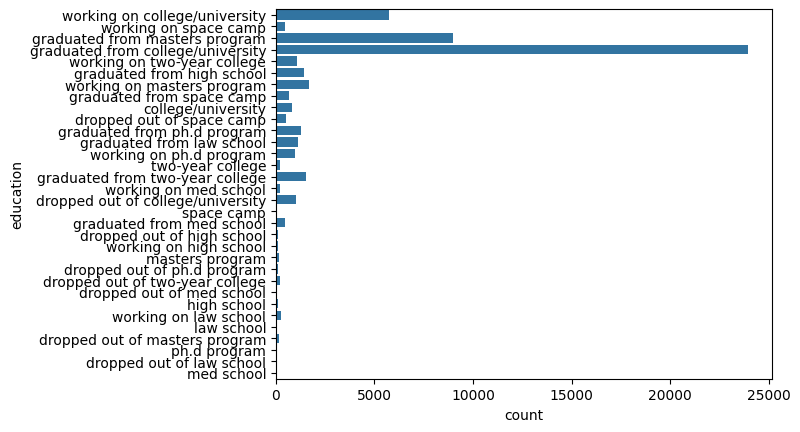

In [24]:
sns.countplot(data=df, y='education')

<Axes: xlabel='count', ylabel='education'>

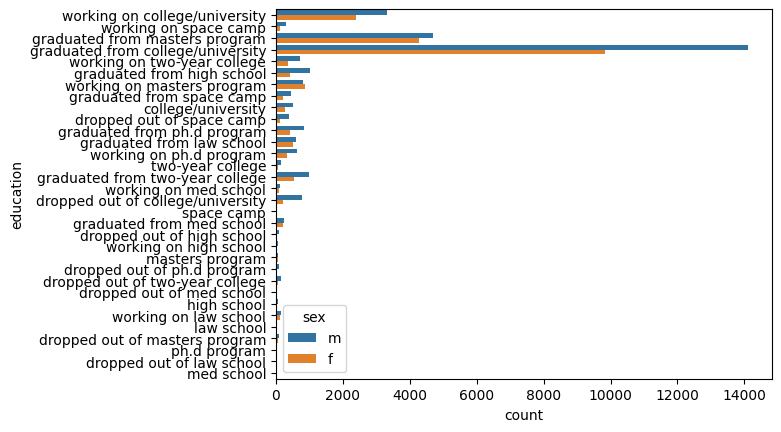

In [25]:
sns.countplot(data=df, y='education', hue='sex')

In [26]:
print(df['ethnicity'].value_counts())

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64


<Axes: xlabel='count', ylabel='job'>

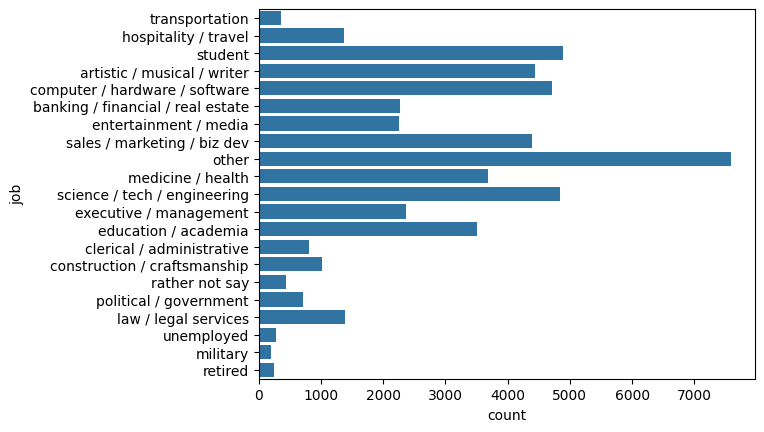

In [27]:
sns.countplot(data=df, y='job')

Job
Dari grafik dibawah terlihat bahwa ada ~5500 siswa yang memilik akun OKCupid dan ada 250 pengguna yang sudah pensiun

<Axes: xlabel='count', ylabel='offspring'>

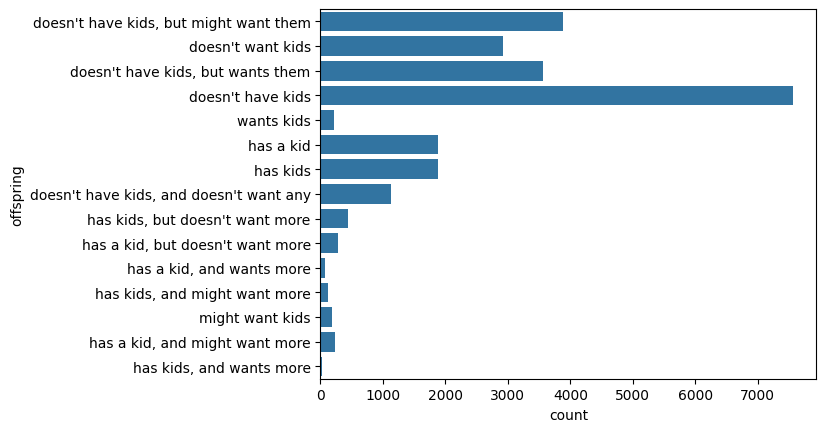

In [28]:
sns.countplot(data=df, y='offspring')

Grafik menunjukkan bahwa sebagian besar pengguna tidak memiliki anak.

<Axes: xlabel='count', ylabel='orientation'>

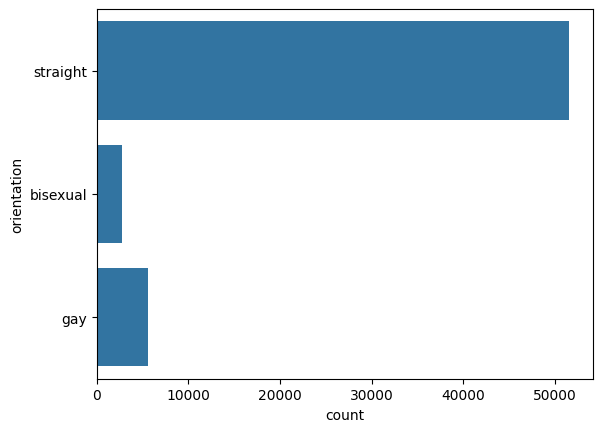

In [29]:
sns.countplot(data=df, y='orientation')

<Axes: xlabel='count', ylabel='orientation'>

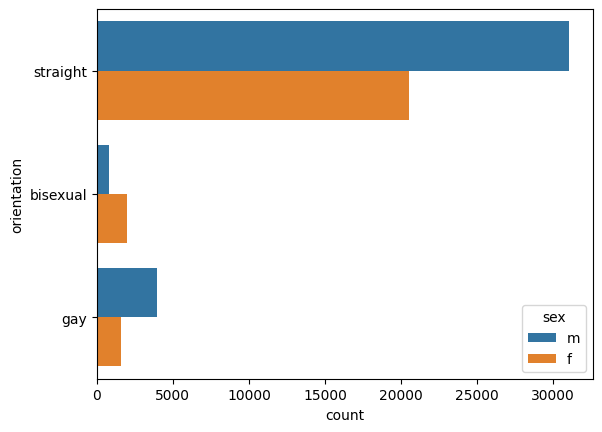

In [30]:
sns.countplot(data=df, y='orientation', hue='sex')

Orientation
Dari garfik dibawah terlihat ada 2767 pengguna yang memiliki orientasi bisexual dan ada 5573 pengguna yang gay.

Dari grafik dibawah terlihat sebagian besar pengguna menyukai anjing dan kucing.

<Axes: xlabel='count', ylabel='pets'>

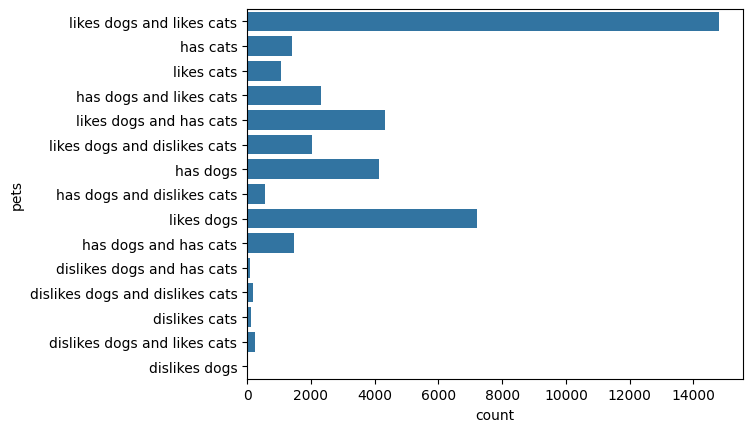

In [31]:
sns.countplot(data=df, y='pets')

<Axes: xlabel='count', ylabel='status'>

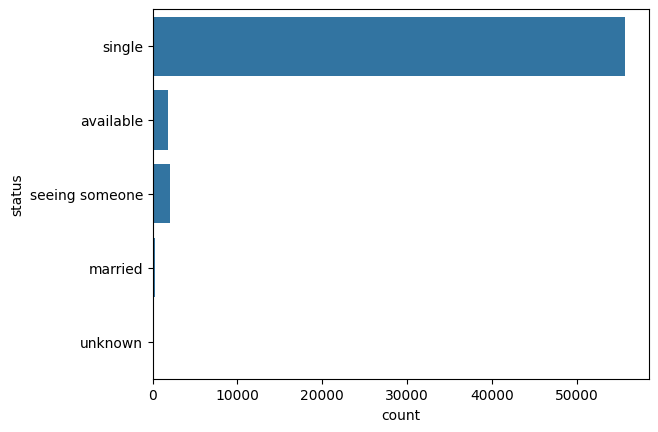

In [32]:
sns.countplot(data=df, y='status')

<Axes: xlabel='count', ylabel='newReligion'>

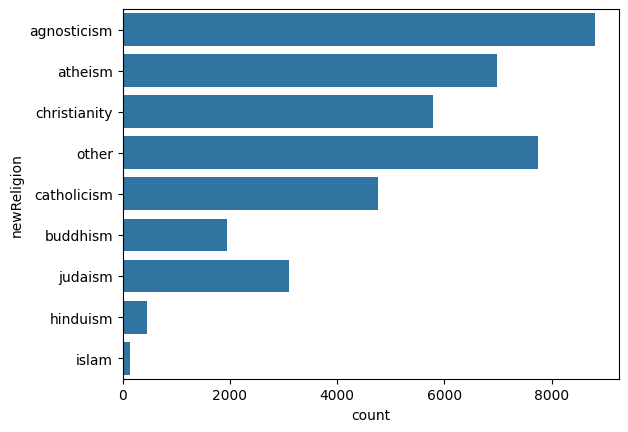

In [35]:
df['newReligion'] = df['religion'].str.split().str.get(0)
sns.countplot(data=df, y='newReligion')

<Axes: xlabel='count', ylabel='newSign'>

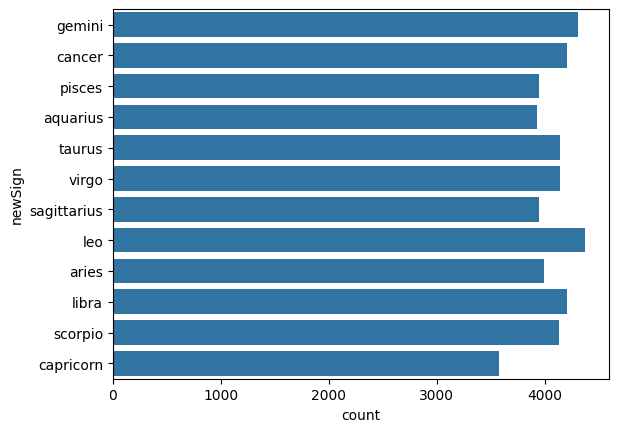

In [37]:
df['newSign'] = df['sign'].str.split().str.get(0)
sns.countplot(data=df, y='newSign')

In [38]:
print(df.isnull().sum())

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
newReligion    20226
newSign        11056
dtype: int64


Memproses data sangat penting untuk modeling machine learning, agar model kita bisa berjalan lebih cepat dan menghasilkan prediksi yang baik.

Jadi kita akan hanya memilih beberapa feature yang mungkin bagus untuk menjadi predictor untuk tanda horoskop.

In [39]:
ft = ['body_type', 'diet', 'job', 'offspring', 'orientation', 'sex', 'newReligion', 'newSign']
df = df[ft].dropna()
df.shape

(11491, 8)

In [40]:
for col in ft[:-1]:
    df = pd.get_dummies(df, columns = [col], prefix = [col])
df.head()

,newSign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,sex_m,newReligion_agnosticism,newReligion_atheism,newReligion_buddhism,newReligion_catholicism,newReligion_christianity,newReligion_hinduism,newReligion_islam,newReligion_judaism,newReligion_other
0,gemini,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,cancer,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,taurus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df.newSign.value_counts()

gemini         1098
leo            1038
cancer         1035
virgo           983
libra           972
scorpio         964
sagittarius     931
pisces          931
taurus          930
aries           922
aquarius        851
capricorn       836
Name: newSign, dtype: int64

In [42]:
col_len = len(df.columns)

# X adalah train dan Y adalah validasi
X = df.iloc[:, 1:col_len]
Y = df.iloc[:, 0:1]

#data di split 30:70
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#turn into 1d array
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [44]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
lr_predict = lr_model.predict(X_train)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predict))

              precision    recall  f1-score   support

    aquarius       0.13      0.04      0.06       584
       aries       0.16      0.09      0.11       651
      cancer       0.13      0.19      0.15       738
   capricorn       0.15      0.07      0.10       581
      gemini       0.14      0.31      0.19       760
         leo       0.13      0.18      0.15       732
       libra       0.12      0.13      0.13       677
      pisces       0.12      0.06      0.08       635
 sagittarius       0.10      0.08      0.09       666
     scorpio       0.11      0.10      0.10       679
      taurus       0.14      0.10      0.12       663
       virgo       0.12      0.14      0.13       677

    accuracy                           0.13      8043
   macro avg       0.13      0.12      0.12      8043
weighted avg       0.13      0.13      0.12      8043



Final akurasi dari Logistic Regression adalah 13% yang mana itu termasuk buruk.